--2025-04-11 20:26:20--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  20.7MB/s    in 17s     

2025-04-11 20:26:38 (10.0 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2025-04-11 20:26:38--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  7.09MB/s    in 18s     

2025-04-11 20:26:56 (3.42 MB/s) - ‘test_32x32.mat’ saved [64275384/64

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


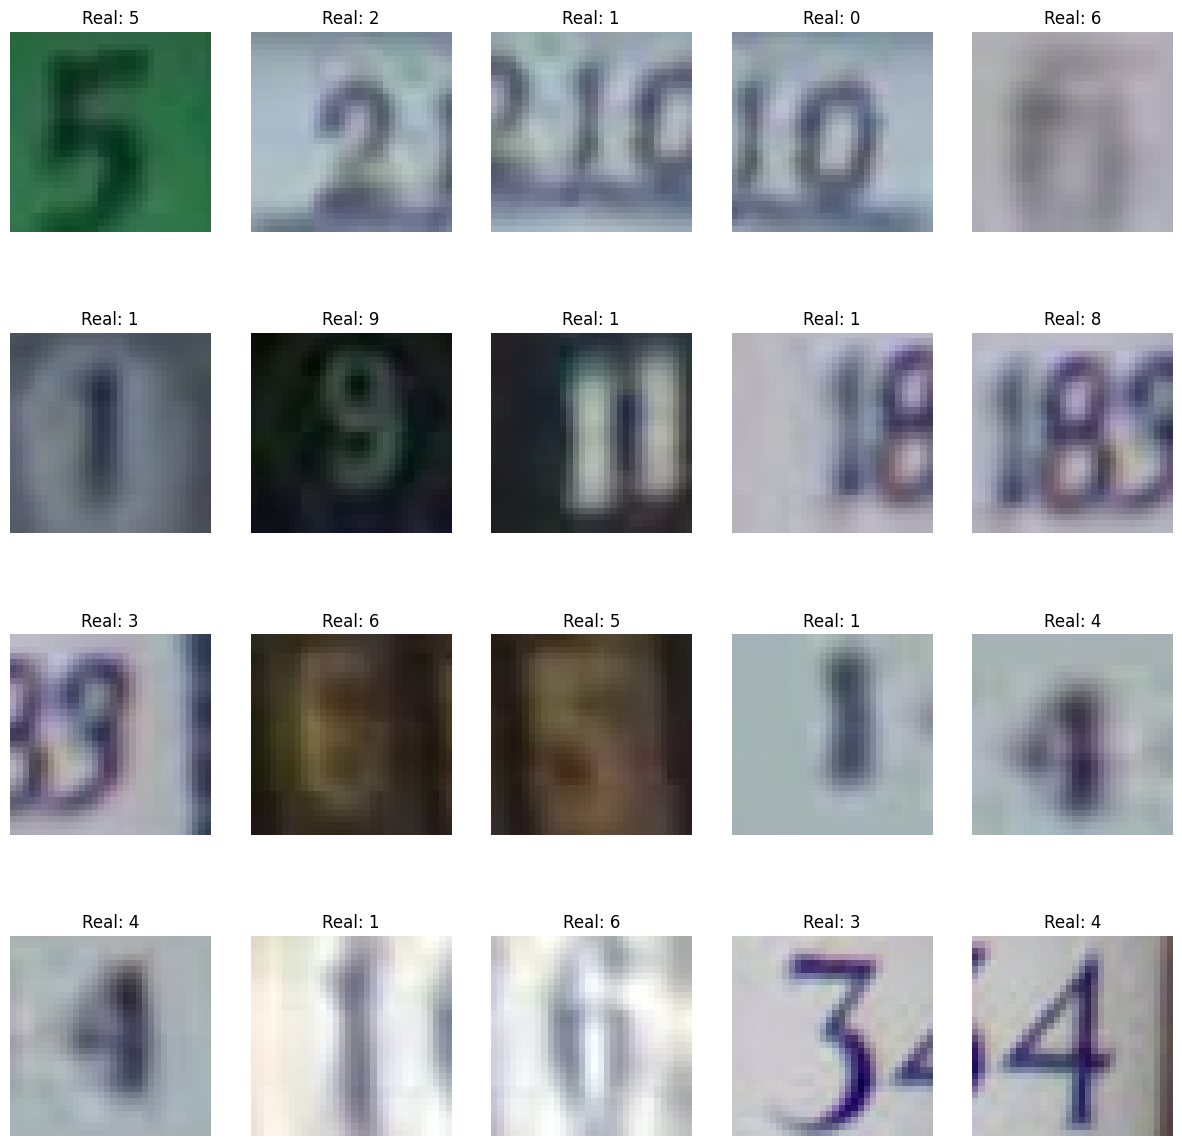

Epoch 1/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 124s 53ms/step - accuracy: 0.5630 - loss: 1.2996 - val_accuracy: 0.8421 - val_loss: 0.5366
Epoch 2/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 129s 47ms/step - accuracy: 0.8655 - loss: 0.4589 - val_accuracy: 0.8734 - val_loss: 0.4386
Epoch 3/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 121s 53ms/step - accuracy: 0.8906 - loss: 0.3698 - val_accuracy: 0.8825 - val_loss: 0.4055
Epoch 4/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 129s 47ms/step - accuracy: 0.9027 - loss: 0.3288 - val_accuracy: 0.8891 - val_loss: 0.3819
Epoch 5/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 144s 48ms/step - accuracy: 0.9107 - loss: 0.3033 - val_accuracy: 0.8963 - val_loss: 0.3633
Epoch 6/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9194 - loss: 0.2738 - val_accuracy: 0.9016 - val_loss: 0.3498
Epoch 7/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 139s 46ms/step - accuracy: 0.9248 - loss: 0.2587 - val_accuracy: 0.8989 - val_loss: 0.3690
Epoch 8/10
2290/2290 ━━━━━━━━━━━━━━━━━━━━ 144s 47ms/step - accuracy: 

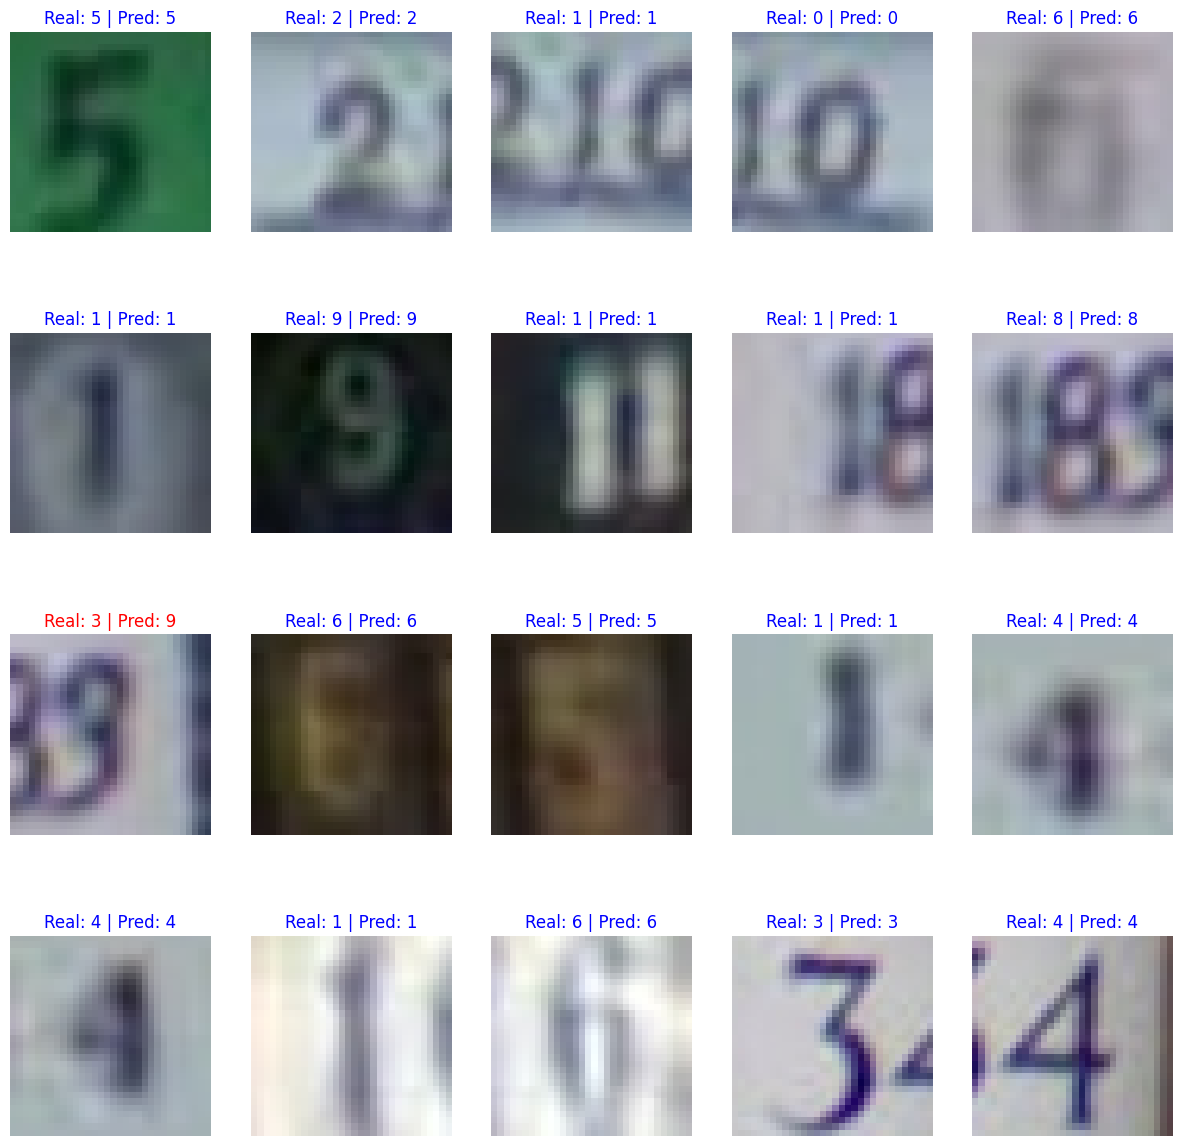

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import scipy.io
import os

# Paso 1: Descargar los archivos de SVHN
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

# Paso 2: Cargar el conjunto de datos SVHN usando scipy.io
def cargar_svhn(path):
    data = scipy.io.loadmat(path)
    images = data['X']
    labels = data['y']

    # Las imágenes están en formato (32, 32, 3, n) y las etiquetas son de 1 a 10
    images = np.transpose(images, (3, 0, 1, 2))  # Cambiar el orden de los ejes
    labels = np.squeeze(labels)  # Hacer que las etiquetas sean un arreglo unidimensional
    labels[labels == 10] = 0  # Cambiar las etiquetas 10 por 0 (porque en el dataset 0 es 10)

    return images, labels

# Cargar los datos de entrenamiento y prueba
x_train_svhn, y_train_svhn = cargar_svhn('train_32x32.mat')
x_test_svhn, y_test_svhn = cargar_svhn('test_32x32.mat')

# Paso 3: Normalizar las imágenes
x_train_svhn = x_train_svhn / 255.0
x_test_svhn = x_test_svhn / 255.0

# Paso 4: Preprocesar las etiquetas para one-hot encoding
y_train_svhn = to_categorical(y_train_svhn, 10)
y_test_svhn = to_categorical(y_test_svhn, 10)

# Paso 5: Crear el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases (dígitos 0-9)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Paso 6: Mostrar algunas imágenes antes de entrenar el modelo
def mostrar_imagenes(imagenes, etiquetas, predicciones=None):
    fig, axes = plt.subplots(4, 5, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        ax.imshow(imagenes[i])
        real = np.argmax(etiquetas[i])
        if predicciones is not None:
            pred = np.argmax(predicciones[i])
            if real == pred:
                ax.set_title(f"Real: {real} | Pred: {pred}", color='blue')
            else:
                ax.set_title(f"Real: {real} | Pred: {pred}", color='red')
        else:
            ax.set_title(f"Real: {real}")
        ax.axis('off')
    plt.show()

# Mostrar las imágenes antes de entrenar
mostrar_imagenes(x_test_svhn[:20], y_test_svhn[:20])

# Paso 7: Entrenar el modelo
history = model.fit(x_train_svhn, y_train_svhn, epochs=10, validation_data=(x_test_svhn, y_test_svhn))

# Paso 8: Hacer predicciones después de entrenar el modelo
predicciones = model.predict(x_test_svhn[:20])

# Paso 9: Mostrar las imágenes después de entrenar y evaluar las predicciones
mostrar_imagenes(x_test_svhn[:20], y_test_svhn[:20], predicciones)
